In [2]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

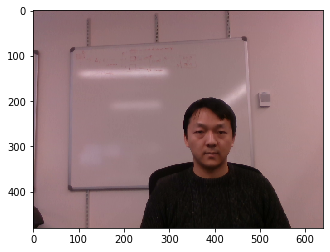

In [26]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,1)
plt.imshow(head1.img_coord_from_xyz())

In [34]:
for i in range (1,16):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    plt.imsave('head_2d_image/full_1_{}.png'.format(i),head.img_coord_from_xyz())

In [41]:
head = HEAD_RECON.threeD_head.read_from_file(1,1)
head.img_coord_from_xyz()
head.reset_filters()
head.filter_nan()
head.filter_depth(1.5)

In [43]:
head.get_filtered_image()

(array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]), 'head_2d_image/head_1_1.png')

In [45]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,1)
head1.create_vpython_spheres()
head1.save()

In [2]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [3]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
#     heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

In [4]:
make_mhead(all_heads,5,6)

ids are not unique
Searching (head 0 and 1), 0/42 done, distance: 0.058478532807476086
ids are not unique
Searching (head 0 and 1), 1/42 done, distance: 0.076834146894509
ids are not unique
Searching (head 0 and 1), 2/42 done, distance: 0.0660683867904602
ids are not unique
Searching (head 0 and 1), 3/42 done, distance: 0.09062837236858838
ids are not unique
Searching (head 0 and 1), 4/42 done, distance: 0.09064909477980608
ids are not unique
Searching (head 0 and 1), 5/42 done, distance: 0.0877838347109574
ids are not unique
Searching (head 0 and 1), 6/42 done, distance: 0.08328069221955402
ids are not unique
Searching (head 0 and 1), 7/42 done, distance: 0.053535374304363365
Searching (head 0 and 1), 8/42 done, distance: 0.057258984539643246
ids are not unique
Searching (head 0 and 1), 9/42 done, distance: 0.07676526477788272
Searching (head 0 and 1), 10/42 done, distance: 0.0661719828083861
Searching (head 0 and 1), 11/42 done, distance: 0.040228048188686846
ids are not unique
Searc

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 0 and 1), 38/42 done, distance: 0.05298424165969011
Searching (head 0 and 1), 39/42 done, distance: 0.14232765210960033
Searching (head 0 and 1), 40/42 done, distance: 0.06549181943159207


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


25 min_dist 0.02042271382589576 params: [ 0.06 20.    4.  ]
ids are not unique
completed
